<a href="https://colab.research.google.com/github/robbespo00/jacobi-spm/blob/main/spm_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
filename = "test1000"   # for 1000 
#filename = "test5000"         # for 5000
#filename = "test15000"        # for 15000
filename_thr = "./drive/MyDrive/spm_data/" + filename + "thr.csv" 
filename_ff =  "./drive/MyDrive/spm_data/" + filename + "ff.csv"
filename_seq = "./drive/MyDrive/spm_data/" + filename + "seq.csv"


df_thr = pd.read_csv(filename_thr, sep="\t", header=None)
df_ff = pd.read_csv(filename_ff, sep="\t", header=None)
df_seq = pd.read_csv(filename_seq, sep="\t", header=None)

thr = np.array(df_thr)
ff = np.array(df_ff)
seq = np.array(df_seq)

with open(filename_seq) as f:
    seq_time = float(f.read())

# **Metrics**

**Speedup**

In [4]:
def compute_speedup(t_par, t_seq):
  return t_seq / t_par


def plot_speedup(sequential_time, threads_time, ff_time, xaxis, flag=False):

  vfunc = np.vectorize(compute_speedup)
  parallel_result = vfunc(threads_time, sequential_time)
  fastflow_result = vfunc(ff_time, sequential_time)

  fig, ax = plt.subplots()
  ax.plot(xaxis, parallel_result, label="Native Threads", linestyle="--", c="grey")
  ax.plot(xaxis, fastflow_result, label="Fast Flow", c="grey")
  if flag:
    ax.plot(xaxis, xaxis, linestyle="-.", c="grey")
  ax.set_xlabel("Number of Threads")
  ax.set_ylabel("Speedup")
  plt.title("Speedup")
  legend = ax.legend()
  plt.show()

**Scalability**

In [5]:
def compute_scalability(t_par1, t_par):
  return t_par1 / t_par

def plot_scalability(t_par1th, t_parnwth, t_par1ff, t_parnwff, xaxis):

  vfunc = np.vectorize(compute_scalability)
  parallel_result = vfunc(t_par1th, t_parnwth)
  fastflow_result = vfunc(t_par1ff, t_parnwff)

  fig, ax = plt.subplots()
  ax.plot(xaxis, parallel_result, label="Native Threads", linestyle="--", c="grey")
  ax.plot(xaxis, fastflow_result, label="Fast Flow", c="grey")
  ax.set_xlabel("Number of Threads")
  ax.set_ylabel("Scalability")
  plt.title("Scalability")
  legend = ax.legend()
  plt.show()

**Efficiency**

In [6]:
def compute_efficiency(speedup, num_thr):
  return speedup / num_thr

def plot_efficiency(sequential_time, threads_time, ff_time, xaxis):


  vfunc = np.vectorize(compute_speedup)
  parallel_sp = vfunc(threads_time, sequential_time)
  fastflow_sp = vfunc(ff_time, sequential_time)


  vfunc = np.vectorize(compute_efficiency)
  parallel_result = vfunc(parallel_sp, xaxis)
  fastflow_result = vfunc(fastflow_sp, xaxis)

  fig, ax = plt.subplots()
  ax.plot(xaxis, parallel_result, label="Native Threads", linestyle="--", c="grey")
  ax.plot(xaxis, fastflow_result, label="Fast Flow", c="grey")
  ax.set_xlabel("Number of Threads")
  ax.set_ylabel("Efficiency")
  plt.title("Efficiency")
  legend = ax.legend()
  plt.show()

**Completion Time**

In [7]:
def plot_time(threads_time, ff_time, xaxis):
  fix, ax = plt.subplots()
  ax.plot(xaxis, threads_time, label="Native Threads", linestyle="--", c="grey")
  ax.plot(xaxis, ff_time, label="Fast Flow", c="grey")
  ax.set_xlabel("Number of Threads")
  ax.set_ylabel("Time (mu sec)")
  plt.title("Completion Time")
  legend = ax.legend()
  plt.show()

# **Plot**

Completion Time

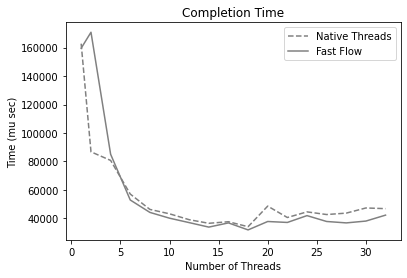

In [8]:
plot_time(thr[:32,1], ff[:32,1], thr[:32,0])

Speedup

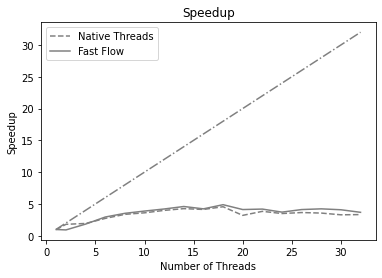

In [10]:
plot_speedup(seq_time, thr[:32,1], ff[:32,1], thr[:32,0], True)

Scalability

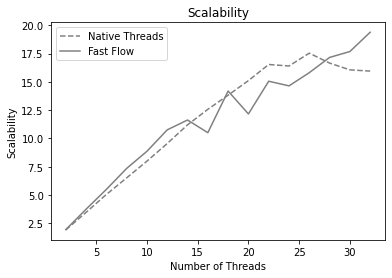

In [125]:
plot_scalability(thr[0,1], thr[1:32,1], ff[0,1], ff[1:32,1], thr[1:32,0])

Efficiency

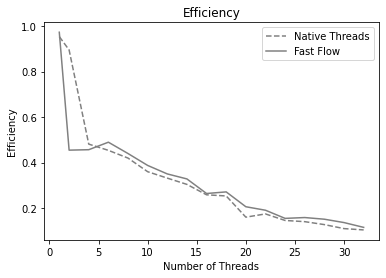

In [9]:
plot_efficiency(seq_time, thr[:32,1], ff[:32,1], thr[:32,0])